# Profitable Algorithmic Trading

In this activity, you’ll write a trading algorithm that buys 100 shares of AMD stock on the days when the price decreases and that sells the accumulated shares on the last day of the trading period.

## Background

After a successful presentation of your trading algorithm to the Board of Directors, they asked you to meet with the Trading Strategies Team to modify your current algorithm to include metrics that can aid customers in evaluating the profitability of the algorithmic trading strategy.

After meeting with the Trading Strategies Team, you were asked to include costs, proceeds, and return on investments metrics to assess the profitability of your trading algorithm.

## Instructions

1. Open the starter code provided. Run the cells of the "Data Loading" section to create the DataFrame with the AMD stock closing data.

2. Using the starter code provided, change the algorithm by modifying the loop to include the cost and proceeds metrics for buys of 100 shares. Make sure that the algorithm checks the following conditions and executes the strategy for each one:

    * If `previous_price = 0`, use the `loc` function to set the “trade_type” column for the current index to “buy”. Set the “cost/proceeds” column to the current share price multiplied by a `share_size` value of 100. Make sure to take the negative value of the expression so that the cost reflects money leaving an account. Finally, make sure to add the bought shares to an `accumulated_shares` variable.

    * Otherwise, if the price of the current day is less than that of the previous day, set the “trade_type” column of the current index to “buy”. Set the “cost/proceeds” column to the current share price multiplied by a `share_size` value of 100. Make sure to take the negative value of the expression so that the cost reflects money leaving an account. Finally, make sure to add the bought shares to an `accumulated_shares` variable.

    * You will not modify the algorithm for instances where the current day’s price is greater than the previous day’s price or when it is equal to the previous day’s price.

    * If the current index is equal to the last index of the DataFrame, set the “trade_type” column for the current index to “sell”. (Use the `index` function to check the current index.) In this case, also set the “cost/proceeds” column to the total number in the `accumulated_shares` variable multiplied by the price of the last day.

3. Run the updated algorithm. Then review the “cost/proceeds” column in the resulting DataFrame to confirm two results. First, the dates that have a “trade_type” of “buy” should have cost values in this column. Second, the final date should have a proceeds value in this column.

4. Calculate the total profit or loss for the trading algorithm by summing the values in the "cost/proceeds" column. Print the value of the total profit or loss from the trades.

    > **Hint** Use the `sum` and `round` functions to sum the values in the “cost/proceeds” column.

5. Calculate the ROI for the trades. To do so, first calculate the invested capital (the total cost of all the buys). Then divide the total profit or loss by the cost of all the buys to determine the ROI. Finally, print the value of the ROI.

## References:

* [Pandas `sum` function documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html)

* [Pandas `round` function documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.round.html)

* [Pandas `iterrows` function documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iterrows.html)

## Data Loading

### Step 1: Run the cells of this section to create the DataFrame with the AMD stock closing data.

In [1]:
# Import the required libraries
import pandas as pd
import numpy as np

In [2]:
# Closing prices for AMD stock
amd_data = [28.99, 28.76, 28.31, 28.68, 29.01, 28.93, 28.23, 28.46, 28.38, 29.75,]

In [3]:
# Create the Pandas DataFrame using the price information supplied
amd_df = pd.DataFrame(
    {"close": amd_data}
)

# Set the index as datetime objects starting from 2019-09-09 and onwards (but only business days)
amd_df.index = pd.bdate_range(start='2019-09-30', periods=10)

# Review the DataFrame
amd_df

,close
2019-09-30,28.99
2019-10-01,28.76
2019-10-02,28.31
2019-10-03,28.68
2019-10-04,29.01
2019-10-07,28.93
2019-10-08,28.23
2019-10-09,28.46
2019-10-10,28.38
2019-10-11,29.75


<AxesSubplot:>

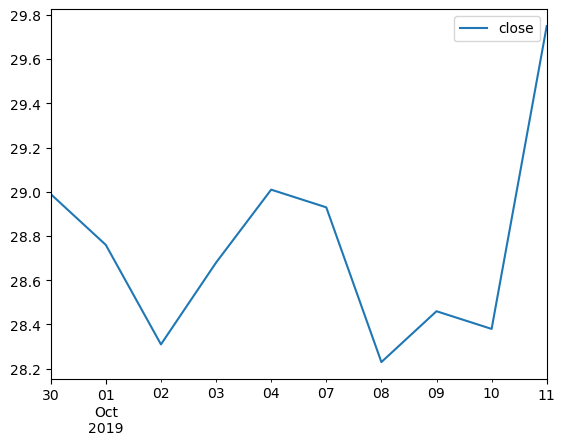

In [4]:
# Visualize the DataFrame using the plot function 
amd_df.plot()

## Trading Algorithm Definition

### Step 2: Using the starter code provided, change the algorithm by modifying the loop to include the cost and proceeds metrics for buys of 100 shares.

In [5]:
# Initialize trade_type column for buys and sells
amd_df['trade_type'] = np.nan

# Initialize variable to hold the previous_price
previous_price = 0

In [6]:
# Initialize a cost/proceeds column for recording trade metrics
amd_df['cost/proceeds'] = np.nan

In [7]:
amd_df

,close,trade_type,cost/proceeds
2019-09-30,28.99,NaN,NaN
2019-10-01,28.76,NaN,NaN
2019-10-02,28.31,NaN,NaN
2019-10-03,28.68,NaN,NaN
2019-10-04,29.01,NaN,NaN
2019-10-07,28.93,NaN,NaN
2019-10-08,28.23,NaN,NaN
2019-10-09,28.46,NaN,NaN
2019-10-10,28.38,NaN,NaN
2019-10-11,29.75,NaN,NaN


In [8]:
# Initialize share_size equals 100 and accumulated_shares equals 0
share_size = 100
accumulated_shares = 0

### Change the loop to include the new trading rules that buys 100 shares of AMD stock on the days when the price decreases and that sells the accumulated shares on the last day of the trading period.

**Important:** Note that the current code includes the rules from the simple trading strategy that you created in the previous activity.

In [9]:
# Loop through the Pandas DataFrame and code the conditions of the trading strategy 
for index, row in amd_df.iterrows():
    
    # buy if the previous price is 0, in other words, buy on the first day
    # set the cost/proceeds column equal to the negative value of the row close price
    # multiplied by the share_size
    # UPDATE THE CODE BELOW
    if previous_price == 0:
        amd_df.loc[index, "trade_type"] = "buy"
        amd_df.loc[index,'cost/proceeds'] = -(row['close']*share_size)
        accumulated_shares += share_size

    # buy if the current day price is less than the previous day price
    # set the cost/proceeds column equal to the negative value of the row close price
    # multiplied by the share_size
    # UPDATE THE CODE BELOW
    elif row["close"] < previous_price:
        amd_df.loc[index, "trade_type"] = "buy"
        amd_df.loc[index, "cost/proceeds"] = -(row['close']*share_size)
        accumulated_shares += share_size

    # sell if the current day price is greater than the previous day price
    elif row["close"] > previous_price:
        amd_df.loc[index, "trade_type"] = "hold"
    

    # else hold if the current day price is equal to the previous day price
    else:
        amd_df.loc[index, "trade_type"] = "hold"
    
    # set the previous_price variable to the close price of the current row
    previous_price = row["close"]

    # if the index is the last index of the Dataframe, sell
    # set the cost/proceeds column equal to the row close price multiplied 
    # by the accumulated_shares
    # UPDATE THE CODE BELOW
    if index == amd_df.index[-1]:
        amd_df.loc[index, "trade_type"] = "sell"
        amd_df.loc[index, 'cost/proceeds'] = row['close'] * accumulated_shares

## Profitability Assessment

### Step 3: Run the updated algorithm. Then review the “cost/proceeds” column in the resulting DataFrame to confirm two results.

In [10]:
# Run the algorithm and review the DataFrame
amd_df

,close,trade_type,cost/proceeds
2019-09-30,28.99,buy,-2899.0
2019-10-01,28.76,buy,-2876.0
2019-10-02,28.31,buy,-2831.0
2019-10-03,28.68,hold,NaN
2019-10-04,29.01,hold,NaN
2019-10-07,28.93,buy,-2893.0
2019-10-08,28.23,buy,-2823.0
2019-10-09,28.46,hold,NaN
2019-10-10,28.38,buy,-2838.0
2019-10-11,29.75,sell,17850.0


### Step 4: Calculate the total profit or loss for the trading algorithm by summing the values in the "cost/proceeds" column. Print the value of the total profit or loss from the trades.

In [11]:
# Calculate the total profit/loss for 100 share size orders
total_pnl = amd_df['cost/proceeds'].sum()

# Print the profit/loss metrics
total_pnl

690.0

### Step 5: Calculate the ROI for the trades.

In [12]:
# Initialize the variable to hold the value of the invested capital
invested_capital = 0

In [13]:
# Calculate the invested capital by adding the cost of all buy trades

for index, row in amd_df.iterrows():
    if row['trade_type'] == 'buy':
        invested_capital = invested_capital + row['cost/proceeds']



In [14]:
invested_capital

-17160.0

In [15]:
# Calculate the return on investment (ROI)
roi = round((total_pnl / -(invested_capital))*100,2)

print(f"the return on investment is {roi}")

the return on investment is 4.02


In [16]:
no_buys = amd_df[amd_df['trade_type']=='buy'].value_counts()

no_buys

close  trade_type  cost/proceeds
28.23  buy         -2823.0          1
28.31  buy         -2831.0          1
28.38  buy         -2838.0          1
28.76  buy         -2876.0          1
28.93  buy         -2893.0          1
28.99  buy         -2899.0          1
dtype: int64

In [17]:
amd_df

,close,trade_type,cost/proceeds
2019-09-30,28.99,buy,-2899.0
2019-10-01,28.76,buy,-2876.0
2019-10-02,28.31,buy,-2831.0
2019-10-03,28.68,hold,NaN
2019-10-04,29.01,hold,NaN
2019-10-07,28.93,buy,-2893.0
2019-10-08,28.23,buy,-2823.0
2019-10-09,28.46,hold,NaN
2019-10-10,28.38,buy,-2838.0
2019-10-11,29.75,sell,17850.0
